In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_excel('Data_Train.xlsx')

In [4]:
train_data.head(7)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
#to find the missing values and sum of theirs
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data.shape

(10683, 11)

In [7]:
#As there are few missing values we can delete them, but if there are more data values we can impute them.
train_data[train_data['Total_Stops'].isnull()]
#As we can see in the below row there are missing values for both the route column and total stops column in the same row

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
#dropna is used to remove missing values
train_data.dropna(inplace=True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
#PERFORM PREPROCESSING AND EXTRACT DECRIVED FEATURES

In [10]:
data = train_data.copy()

In [11]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [12]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [13]:
#Date_Of_Journey cannot be of the datatype object we have to convert it to timestamp(similarly for the other necessary columns)
def change_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [14]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [16]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [17]:
train_data['Journey_day']=train_data['Date_of_Journey'].dt.day

In [18]:
train_data['Journey_month']=train_data['Date_of_Journey'].dt.month

In [19]:
train_data['Journey_year']=train_data['Date_of_Journey'].dt.year

In [20]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-07-27 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-27 05:50:00,2022-07-27 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [21]:
## Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [22]:
train_data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-07-27 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-27 05:50:00,2022-07-27 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [23]:
#PERFORM DATA CLEANING AND FEATURIZATION 
#Lets try to clean and featurize Dep_time and Arrival_Time
def extract_hour(df,col):
    df[col+"_hour"]=df[col].dt.hour
    df[col+"_minute"]=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(2)

In [24]:
extract_hour(train_data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-27 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [25]:
extract_hour(train_data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [26]:
#PERFORM DATA ANALYSIS
#Lets analyze when will most of the flights take off
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return 'Early morning'
    elif (x>8) and (x<=12):
        return 'Morning'
    elif (x>12) and (x<=16):
        return 'Afternoon'
    elif (x>16) and (x<=20):
        return 'Evening'
    elif (x>20) and (x<=24):
        return 'Night'
    else:
        return 'Late Night'

In [27]:
train_data['Dep_Time_hour'].apply(flight_dep_time)

0                Night
1        Early morning
2              Morning
3              Evening
4            Afternoon
             ...      
10678          Evening
10679          Evening
10680    Early morning
10681          Morning
10682          Morning
Name: Dep_Time_hour, Length: 10682, dtype: object

<AxesSubplot:>

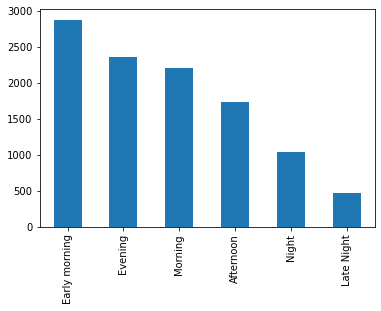

In [28]:
train_data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

In [29]:
#PERFOM PREPROCESSING ON DURATION FEATURE AND EXTRACT MEANING FULL FEATURE
def preprocess_duration(x):
    if 'h' not in x:
        x='0h '+x
    elif 'm' not in x:
        x=x+' 0m'
    return x

In [30]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [31]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [32]:
train_data['Duration'][0].split(' ')[0]

'2h'

In [33]:
train_data['Duration'][0].split(' ')[1]

'50m'

In [34]:
int(train_data['Duration'][0].split(' ')[0][0:-1])

2

In [35]:
int(train_data['Duration'][0].split(' ')[1][0:-1])

50

In [36]:
train_data['Duration_hours']=data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [37]:
train_data['Duration_mins']=data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [38]:
train_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0


In [39]:
#Analyze whether the duration feature effects the price or not
#Which city has maximum final destination of flights
train_data['Duration_total_mins']=train_data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [40]:
train_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140


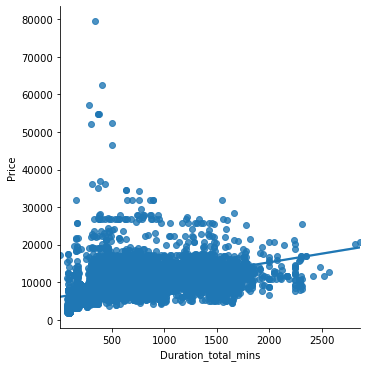

In [41]:
sns.lmplot(x='Duration_total_mins',y='Price',data=train_data)
# Conclusion-->> pretty clear that As the duration of minutes increases Flight price also increases.

In [42]:
train_data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [43]:
train_data['Destination'].value_counts()


Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:>

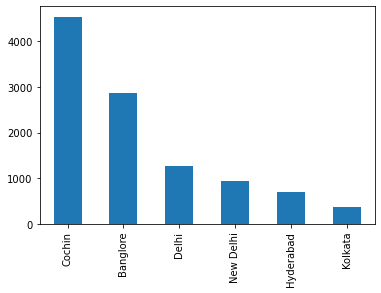

In [44]:
train_data['Destination'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Destination'>

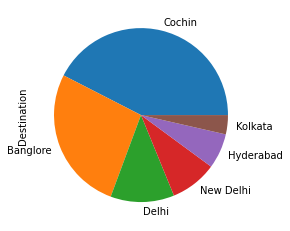

In [45]:
train_data['Destination'].value_counts().plot(kind='pie')

In [46]:
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [47]:
#on which lane jet airways is used much
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

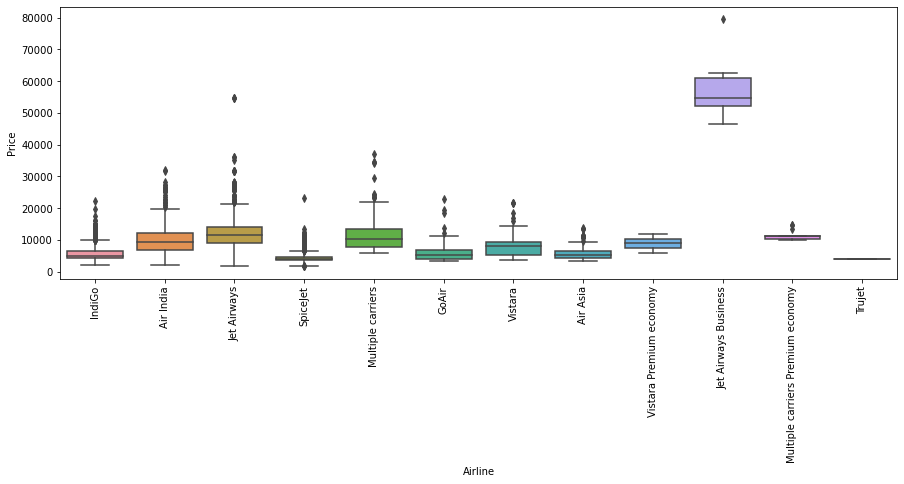

In [48]:
#Airline vs Price analysis
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=train_data)
plt.xticks(rotation='vertical')

In [49]:
#Lets Perform Feature-Encoding on Data !
#Applying one-hot on data !
#Lets go through the Additional_Info column
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [50]:
#depicts the percentage of the previous shown data, rounded off to 2 decimal places
np.round(train_data['Additional_Info'].value_counts()/len(train_data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [51]:
# Additional_Info contains almost 80% no_info,so we can drop this column
# we can drop Route as well as we have pre-process that column
## lets drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"

train_data.drop(columns=['Journey_year'],axis=1,inplace=True)

In [52]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25,445


In [53]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hours', 'Duration_mins',
       'Duration_total_mins'],
      dtype='object')

In [54]:
#Lets separate categorical data & numerical data !
#categorical data are those whose data-type is 'object'
#Numerical data are those whose data-type is either int of float
cat_col=[col for col in train_data.columns if train_data[col].dtype == 'object']

In [55]:
num_col=[col for col in train_data.columns if train_data[col].dtype!='object']

In [56]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [57]:
num_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins',
 'Duration_total_mins']

In [58]:
train_data['Source']

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10682, dtype: object

In [59]:
train_data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [60]:
#Handling Categorical Data
#We are using 2 basic Encoding Techniques to convert Categorical data into some numerical format
#if data belongs to Nominal data (ie data is not in any order) -->> OneHotEncoder is used in this case
#if data belongs to Ordinal data (ie data is in order ) -->>       LabelEncoder is used in this case
for category in train_data['Source'].unique():
    train_data['Source_'+category]=train_data['Source'].apply(lambda x: 1 if x==category else 0)

In [61]:
train_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,...,4,25,19,0,1140,0,0,1,0,0


In [62]:
#Performing Target Guided Mean Encoding !
#ofcourse we can use One-hot , but if we have more sub-categories , it creates curse of dimensionality in ML..
#lets use Target Guided Mean Encoding in order to get rid of this..
airlines=train_data.groupby(['Airline'])['Price'].mean().sort_values().index

In [63]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [64]:
#create a dictionary for the above keys
d1={key:index for index,key in enumerate(airlines,0)}

In [65]:
d1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [66]:
train_data['Airline']=train_data['Airline'].map(d1)

In [67]:
train_data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [68]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,...,13,15,7,25,445,0,1,0,0,0


In [69]:
train_data['Destination'].unique()
#we can see that Delhi has been shown in 2 different ways, so we have work on that

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [70]:
train_data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [71]:
train_data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [72]:
dest=train_data.groupby(['Destination'])['Price'].mean().sort_values().index

In [73]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [74]:
d2={key:index for index,key in enumerate(dest,0)}

In [75]:
d2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [76]:
train_data['Destination']=train_data['Destination'].map(d2)

In [77]:
train_data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [78]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,...,13,15,7,25,445,0,1,0,0,0


In [79]:
train_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [80]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [81]:
train_data['Total_Stops']=train_data['Total_Stops'].map(stops)

In [82]:
train_data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [83]:
#Performing Outlier Detection !
#Here the list of data visualization plots to spot the outliers.
#Box and whisker plot (box plot).
#Scatter plot.
#Histogram.
#Distribution Plot.
#QQ plot
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)
    

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

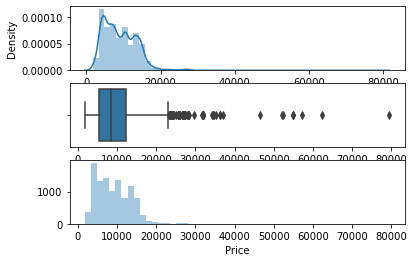

In [84]:
plot(train_data,'Price')

In [85]:
#getting a high level over-view of various ways to deal with outliers:
train_data['Price']=np.where(train_data['Price']>=35000,train_data['Price'].median(),train_data['Price'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

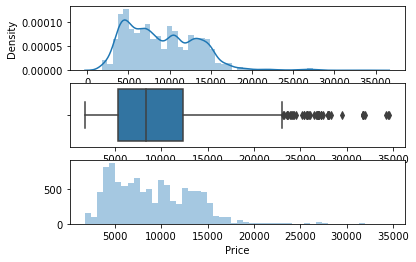

In [86]:
plot(train_data,'Price')

In [87]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,BLR → DEL,2h 50m,0,No info,3897.0,24,3,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,5,1,...,13,15,7,25,445,0,1,0,0,0


In [88]:
train_data.drop(columns=['Source','Duration'],axis=1,inplace=True)

In [89]:
train_data.head(2)

,Airline,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,BLR → DEL,0,No info,3897.0,24,3,22,20,1,10,2,50,170,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,2,No info,7662.0,5,1,5,50,13,15,7,25,445,0,1,0,0,0


In [90]:
train_data.dtypes

Airline                  int64
Destination              int64
Route                   object
Total_Stops              int64
Additional_Info         object
Price                  float64
Journey_day              int64
Journey_month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hours           int64
Duration_mins            int64
Duration_total_mins      int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

In [91]:
from sklearn.feature_selection import mutual_info_regression

In [92]:
X=train_data.drop(['Price'],axis=1)

In [93]:
y=train_data['Price']

In [94]:
X.dtypes

Airline                 int64
Destination             int64
Route                  object
Total_Stops             int64
Additional_Info        object
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int64
Duration_mins           int64
Duration_total_mins     int64
Source_Banglore         int64
Source_Kolkata          int64
Source_Delhi            int64
Source_Chennai          int64
Source_Mumbai           int64
dtype: object

In [108]:
mutual_info_regression(X,y)

ValueError: could not convert string to float: 'BLR → DEL'

In [96]:
imp=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp.columns=['importance']

ValueError: could not convert string to float: 'BLR → DEL'

In [97]:
imp.sort_values(by='importance',ascending=False)

NameError: name 'imp' is not defined

In [98]:
#Applying ML on data
#Split data into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [100]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (8011, 19)
The size of training output is (8011,)
The size of testing input is (2671, 19)
The size of testing output is (2671,)


In [101]:
lr=LinearRegression()

knn = KNeighborsRegressor(n_neighbors=20)

dt = DecisionTreeRegressor(max_depth = 10)

rf = RandomForestRegressor(max_depth = 10, n_estimators=500)


NameError: name 'RandomForestRegressor' is not defined

In [102]:
# Testing with linear regression
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r1 = r2_score(y_test,y_pred)
r1

ValueError: could not convert string to float: 'DEL → BOM → COK'

In [103]:
# Testing with KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

ValueError: could not convert string to float: 'DEL → BOM → COK'

In [104]:
# Testing with RandomForestRegressor
rf = RandomForestRegressor(max_depth = 10, n_estimators=500)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
from sklearn.metrics import r2_score
r4 = r2_score(y_test,y_pred)
r4

NameError: name 'RandomForestRegressor' is not defined

In [105]:
# Testing with DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
from sklearn.metrics import r2_score
r3 = r2_score(y_test,y_pred)
r3

ValueError: could not convert string to float: 'DEL → BOM → COK'

In [106]:
# Model Results
metric_results= {'Model': ['linear Regression', 'KNeighbors', 'Decision Tree','RandomForest'], 
                 'R Square': [r1, r2, r3,r4]}
metrics= pd.DataFrame(metric_results)
metrics

NameError: name 'r1' is not defined

In [107]:
#Hence Random forest Regression provides the best accuracy